In This notebook

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
#py.set_credentials_file(username='raoshaheryarkhan', api_key='KswnKD2cSzUMp6zxf25p')
import plotly.figure_factory as ff
import math
from datetime import datetime
import sys
import os

In [2]:
project_path = "PycharmProjects/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)


In [3]:
os.chdir("/Users\RSK\PycharmProjects\Amazon-Mining")
from src.data.json_loader import JSONLoader

In [4]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
os.chdir("/Users\RSK")
file_path = 'Documents\DataMining/reviews_Electronics_5.json.gz'
loader = JSONLoader()

In [5]:
'''# data is a Pandas Dataframe object.
data = loader.load_data(file_path)'''

'# data is a Pandas Dataframe object.\ndata = loader.load_data(file_path)'

In [6]:
ratingData = pd.read_json('PycharmProjects\Amazon-Mining\dataset\Product_Ratings.json', orient='columns')

In [7]:
priceData = pd.read_json('PycharmProjects\Amazon-Mining\dataset\Product_Prices.json', orient='columns')


In [8]:
productData = pd.merge(priceData, ratingData, on = "asin")

In [9]:
def priceRangeUpTo(row):
    x = row['price']
    if math.isnan(x):
        return 'NaN'
    if x > 300:
        return (int(((x-1.1)/100)+1)) * 100
    y =  (int(((x-1.1)/50)+1)) * 50
    if y < 50:
        return 1
    return y

In [10]:
productData['ranges'] = productData.apply (lambda row: priceRangeUpTo (row),axis=1)
productData

,asin,price,overall,ranges
0,B0016G71MM,18.99,4.200000,50
1,B000067REG,3.69,4.363636,50
2,B0016G9NXM,NaN,2.857143,NaN
3,B0016GBLH8,38.00,5.000000,50
4,B0016GCI84,155.26,3.500000,200
5,B0016GO2KG,62.99,4.200000,100
6,B000067RC5,3.40,3.806452,50
7,B0016GS1DK,669.00,4.888889,700
8,B0016GPDS6,NaN,3.800000,NaN
9,B0016GRFYG,19.99,4.125000,50


In [11]:
priceRangeRatings = productData[['ranges','overall']].groupby(['ranges'], as_index=False).mean()
priceRangeRatings

,ranges,overall
0,1,4.079689
1,50,4.148848
2,100,4.077571
3,150,4.106030
4,200,4.133150
5,250,4.199122
6,300,4.163372
7,400,4.202119
8,500,4.251339
9,600,4.244517


In [12]:
priceRangeRatings['overall'] = priceRangeRatings.overall.round(2)

In [13]:
priceRangeRatings

,ranges,overall
0,1,4.08
1,50,4.15
2,100,4.08
3,150,4.11
4,200,4.13
5,250,4.20
6,300,4.16
7,400,4.20
8,500,4.25
9,600,4.24


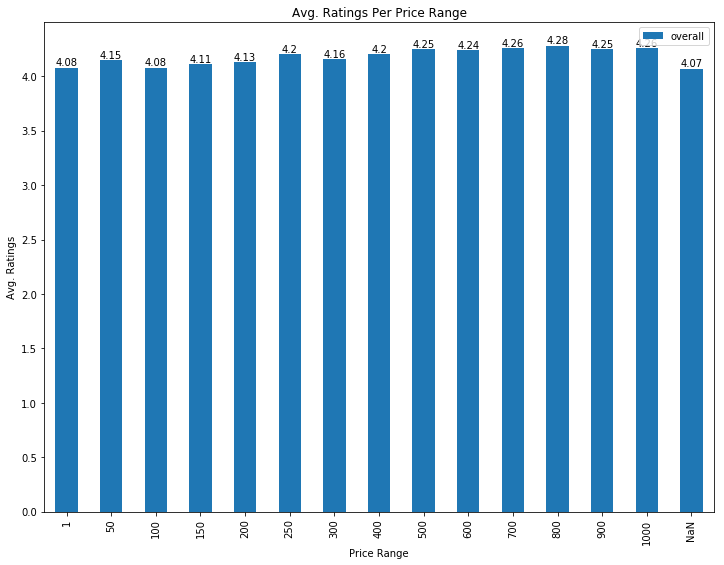

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
dfPlot = priceRangeRatings.plot(x="ranges", y="overall", kind="bar")
dfPlot.set_title("Avg. Ratings Per Price Range")
dfPlot.set_xlabel("Price Range")
dfPlot.set_ylabel("Avg. Ratings")
rects = dfPlot.patches
labels = [i for i in priceRangeRatings.loc[:,'overall']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    dfPlot.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')

plt.savefig('PycharmProjects/Amazon-Mining/reports/Review Data/PriceRangeAvgRatings.png', format='png', dpi=720)

In [15]:
data = loader.load_data(file_path)

In [16]:
def word_count(row):
    str = row['reviewText']
    tokens = str.split()
    n_tokens = len(tokens)
    return n_tokens
data['wordCount'] = data.apply (lambda row: word_count (row),axis=1)

In [17]:
wordData = data[['asin','wordCount']].copy()


In [18]:
del data

In [19]:
avgWordData = wordData[['asin','wordCount']].groupby(['asin'], as_index=False).mean()

In [20]:
avgWordData['wordCount'] = avgWordData.wordCount.round()

In [21]:
productW_P = pd.merge(productData, avgWordData, on = "asin")
productW_P


,asin,price,overall,ranges,wordCount
0,B0016G71MM,18.99,4.200000,50,73.0
1,B000067REG,3.69,4.363636,50,53.0
2,B0016G9NXM,NaN,2.857143,NaN,197.0
3,B0016GBLH8,38.00,5.000000,50,92.0
4,B0016GCI84,155.26,3.500000,200,128.0
5,B0016GO2KG,62.99,4.200000,100,90.0
6,B000067RC5,3.40,3.806452,50,52.0
7,B0016GS1DK,669.00,4.888889,700,208.0
8,B0016GPDS6,NaN,3.800000,NaN,59.0
9,B0016GRFYG,19.99,4.125000,50,204.0


In [22]:
priceRangeAvgWords = productW_P[['ranges','wordCount']].groupby(['ranges'], as_index=False).mean()

In [23]:
priceRangeAvgWords['wordCount'] = priceRangeAvgWords.wordCount.round()

In [24]:
priceRangeAvgWords

,ranges,wordCount
0,1,64.0
1,50,93.0
2,100,140.0
3,150,161.0
4,200,170.0
5,250,178.0
6,300,198.0
7,400,212.0
8,500,214.0
9,600,217.0


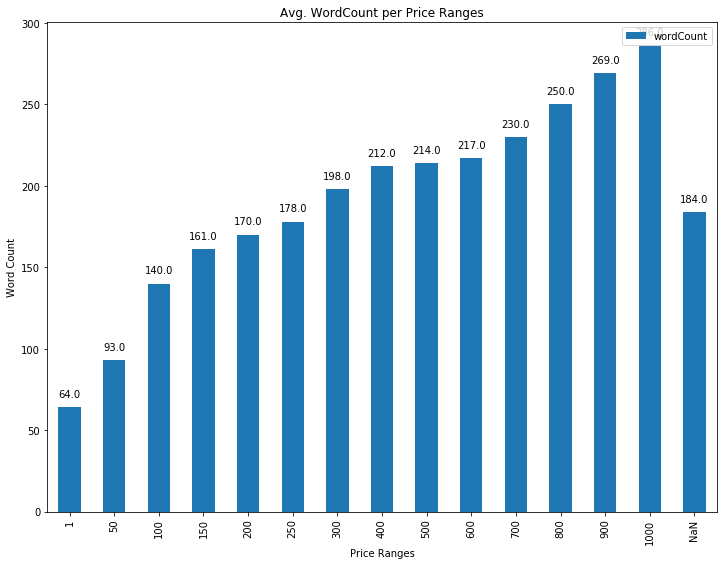

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
wordPlot = priceRangeAvgWords.plot( x="ranges", y="wordCount", kind="bar")
wordPlot.set_title("Avg. WordCount per Price Ranges")
wordPlot.set_xlabel("Price Ranges")
wordPlot.set_ylabel("Word Count")
rects = wordPlot.patches
labels = [i for i in priceRangeAvgWords.loc[:,'wordCount']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    wordPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig('PycharmProjects/Amazon-Mining/reports/Review Data/PriceRangeAvgWordCount.png', format='png', dpi=720)